<a href="https://colab.research.google.com/github/Raylow00/reverse-vending-machine/blob/main/Binary_Classification%20(Plastic_Bottles_and_Aluminium_Cans).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!unzip /content/drive/My\ Drive/Reverse\ Vending\ Machine/ObjectDetector/v2/my_dataset_split_v2.zip > /dev/null

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
train_data = '1293_split_v2/train'
val_data = '1293_split_v2/val'
test_data = '1293_split_v2/test'

In [ ]:
def generate_data(train_dir, val_dir, test_dir, image_size=224, augmentation=False):
  if augmentation:
    train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   rotation_range=15,
                                   vertical_flip=True,
                                   fill_mode='reflect',
                                   data_format='channels_last',
                                   brightness_range=[0.5, 1.5],
                                   featurewise_center=True,
                                   featurewise_std_normalization=True)
  else:
    train_datagen = ImageDataGenerator(rescale=1./255)

  test_datagen = ImageDataGenerator(rescale=1./255)

  train_generator = train_datagen.flow_from_directory(train_dir, target_size=(image_size, image_size), batch_size=5, class_mode='binary')
  validation_generator = test_datagen.flow_from_directory(val_dir, target_size=(image_size, image_size), batch_size=2, class_mode='binary')
  test_generator = test_datagen.flow_from_directory(test_dir, target_size=(image_size, image_size), batch_size=2, class_mode='binary', shuffle=False)

  # Output of the generator
  for data, label in train_generator:
    print("Data batch shape: ", data.shape)
    print("Label batch shape: ", label.shape)
    break

  return train_generator, validation_generator, test_generator

In [ ]:
from tensorflow.keras.layers import Input
vgg16 = tf.keras.applications.vgg16.VGG16(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))
model = Sequential()
for layer in vgg16.layers[:-1]:
  model.add(layer)

for layer in model.layers:
  layer.trainable = False

model.add(Flatten())
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [ ]:
# Train
model.compile(optimizer=Adam(learning_rate=1e-5), 
                loss='binary_crossentropy', 
                metrics=['accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), tf.keras.metrics.AUC()])

In [ ]:
train_generator, validation_generator, test_generator = generate_data(train_data, val_data, test_data, augmentation=False)

Found 1806 images belonging to 2 classes.
Found 386 images belonging to 2 classes.
Found 390 images belonging to 2 classes.
Data batch shape:  (5, 224, 224, 3)
Label batch shape:  (5,)


In [ ]:
tf.config.run_functions_eagerly(True)
history = model.fit_generator(train_generator, 
                                steps_per_epoch=10, 
                                epochs=50, 
                                validation_data=validation_generator, 
                                validation_steps=10
                                )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  
/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Epoch 1/50
10/10 [==============================] - 5s 506ms/step - loss: 0.7084 - accuracy: 0.3800 - recall_4: 0.4483 - precision_4: 0.4643 - auc_4: 0.3727 - val_loss: 0.6619 - val_accuracy: 0.6000 - val_recall_4: 0.8889 - val_precision_4: 0.5333 - val_auc_4: 0.8182
Epoch 2/50
10/10 [==============================] - 5s 457ms/step - loss: 0.6450 - accuracy: 0.5600 - recall_4: 0.7727 - precision_4: 0.5000 - auc_4: 0.7841 - val_loss: 0.6186 - val_accuracy: 0.7500 - val_recall_4: 0.6667 - val_precision_4: 0.7500 - val_auc_4: 0.8687
Epoch 3/50
10/10 [==============================] - 5s 494ms/step - loss: 0.6072 - accuracy: 0.7000 - recall_4: 0.7000 - precision_4: 0.6087 - auc_4: 0.8450 - val_loss: 0.5517 - val_accuracy: 0.9000 - val_recall_4: 0.8000 - val_precision_4: 1.0000 - val_auc_4: 0.9900
Epoch 4/50
10/10 [==============================] - 4s 453ms/step - loss: 0.4988 - accuracy: 0.8800 - recall_4: 0.6250 - precision_4: 1.0000 - auc_4: 0.9660 - val_loss: 0.6354 - val_accuracy: 0.55

(0.0, 2.0)

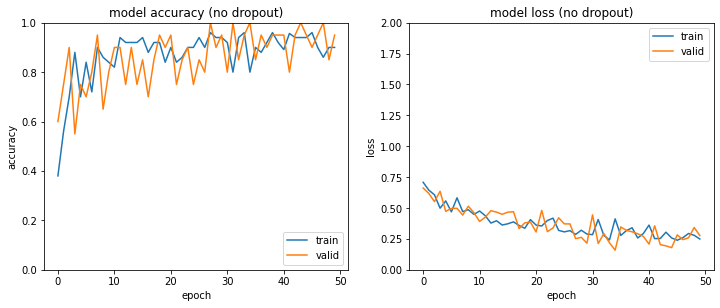

In [ ]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylim(0, 1)
plt.title('model accuracy (no dropout)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(2,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss (no dropout)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.ylim([0,2])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


{'bottle': 0, 'can': 1}
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[0.12149447]
 [0.10510287]
 [0.12849954]
 [0.1412092 ]
 [0.09325408]
 [0.08537371]
 [0.11007534]
 [0.11854387]
 [0.12492354]
 [0.08638646]
 [0.1093922 ]
 [0.12683801]
 [0.09685773]
 [

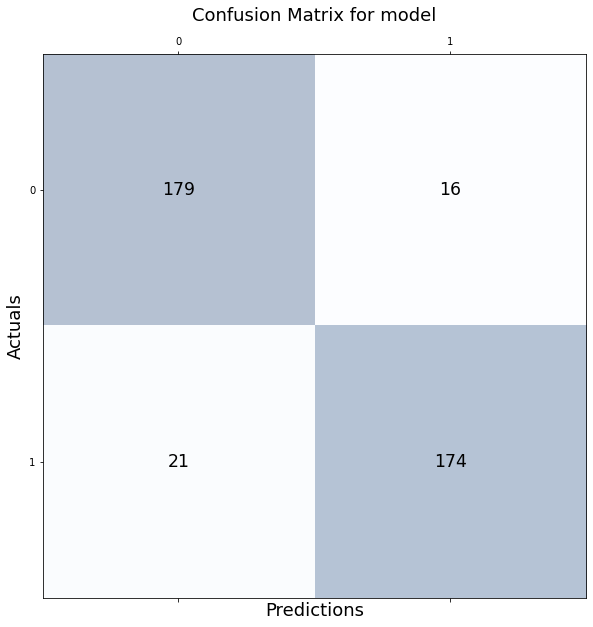

In [ ]:
test_metrics = model.evaluate_generator(test_generator, steps=2)
predictions = model.predict_generator(test_generator)
print(test_generator.class_indices)
print(test_generator.classes)
print(predictions)
pred = [int(i > 0.5) for i in predictions]
# pred = [np.argmax(i) for i in predictions]
print(pred)

# Confusion matrix
y_true = test_generator.classes
y_pred = pred

# Classification report
print(classification_report(y_true, y_pred))

cm = confusion_matrix(y_true, y_pred)
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix for model', fontsize=18)
plt.show()